# Total Nitrogen

## 1. Load dataset from AIMS eReefs

### The dataset timeline is from April,2018 to April, 2019.

In [1]:
import os 
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from netCDF4 import Dataset, num2date
from matplotlib import pyplot as plt
import urllib.request
import datetime as dt
if not os.path.exists('temp'):
    os.makedirs('temp')
extractionfile = os.path.join('temp','2109.adcc072-collected.csv')
if not os.path.exists(extractionfile):
    print("Downloading extraction data ...")
    url = 'https://api.ereefs.aims.gov.au/data-extraction/request/2109.adcc072/files/2109.adcc072-collected.csv'
    req = urllib.request.urlretrieve(url, extractionfile)
    print(req)
else:
    print("Skipping redownloading extraction data")
df=pd.read_csv(extractionfile)
df['Aggregated Date/Time']=pd.to_datetime(df['Aggregated Date/Time'],format="%Y-%m-%d")
data=pd.DataFrame(df,columns=['Aggregated Date/Time','Variable','Site Name','mean'])
data.head()

Skipping redownloading extraction data


,Aggregated Date/Time,Variable,Site Name,mean
0,2018-04-01,TOTAL_NITROGEN,site1,105.010799
1,2018-04-01,TOTAL_NITROGEN,site2,125.912900
2,2018-04-01,DIP,site1,0.688174
3,2018-04-01,DIP,site2,0.410980
4,2018-04-01,DOR_P,site1,6.117565


## 2. Organize the dataset

### 2.1 Pick total nitrogen part dataset

In [2]:
sheet =data[data['Variable'].str.contains("TOTAL_NITROGEN")]
sheet.head()

,Aggregated Date/Time,Variable,Site Name,mean
0,2018-04-01,TOTAL_NITROGEN,site1,105.010799
1,2018-04-01,TOTAL_NITROGEN,site2,125.912900
8,2018-04-02,TOTAL_NITROGEN,site1,104.463466
9,2018-04-02,TOTAL_NITROGEN,site2,138.695269
16,2018-04-03,TOTAL_NITROGEN,site1,104.600356


### 2.2 Rebuild the sheet

In [3]:
newdata=pd.pivot_table(sheet,index=['Aggregated Date/Time','Site Name'],values=['mean'])
newdata.head()

mean
Aggregated Date/Time Site Name            
2018-04-01           site1      105.010799
                     site2      125.912900
2018-04-02           site1      104.463466
                     site2      138.695269
2018-04-03           site1      104.600356

## 3. Create the plots

### The plots tells changes of mean total nitrogen concentration for four seasons.

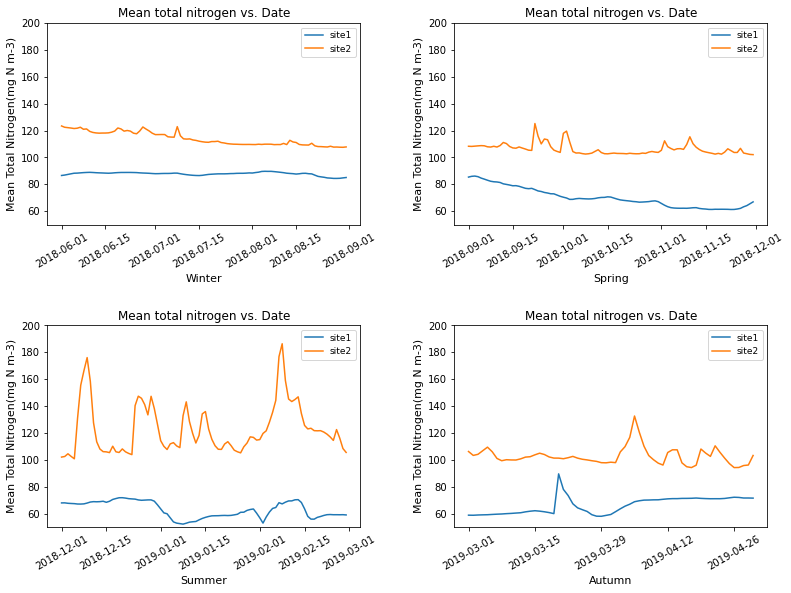

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize = (10, 7))
plt.subplot(2,2,1)
winter=sns.lineplot(x='Aggregated Date/Time', y='mean', hue='Site Name', data=newdata['2018-06-01':'2018-08-31'])#winter
#ax = plt.gca()
plt.xticks(rotation=30)
plt.title('Mean total nitrogen vs. Date')
plt.legend(fontsize=9)
plt.xlabel('Winter',fontsize=11)
plt.ylabel('Mean Total Nitrogen(mg N m-3)',fontsize=11)
plt.ylim([50, 200])

plt.subplot(2,2,2)
spring=sns.lineplot(x='Aggregated Date/Time', y='mean', hue='Site Name', data=newdata['2018-09-01':'2018-11-30'])#spring
#ax = plt.gca()
plt.xticks(rotation=30)
plt.title('Mean total nitrogen vs. Date')
plt.legend(fontsize=9)
plt.xlabel('Spring',fontsize=11)
plt.ylabel('Mean Total Nitrogen(mg N m-3)',fontsize=11)
plt.ylim([50, 200])

plt.subplot(2,2,3)
summer=sns.lineplot(x='Aggregated Date/Time', y='mean', hue='Site Name',data=newdata['2018-12-01':'2019-02-28'])#summer
#ax = plt.gca()
plt.xticks(rotation=30)
plt.title('Mean total nitrogen vs. Date')
plt.legend(fontsize=9)
plt.xlabel('Summer',fontsize=11)
plt.ylabel('Mean Total Nitrogen(mg N m-3)',fontsize=11)
plt.ylim([50, 200])

plt.subplot(2,2,4)
fall=sns.lineplot(x='Aggregated Date/Time', y='mean', hue='Site Name', data=newdata['2019-03-1':'2019-04-30'])#fall
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.FR, interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=30)
plt.title('Mean total nitrogen vs. Date')
plt.legend(fontsize=9)
plt.xlabel('Autumn',fontsize=11)
plt.ylabel('Mean Total Nitrogen(mg N m-3)',fontsize=11)
plt.ylim([50, 200])

plt.subplots_adjust(left=0.5,bottom=0.5,right=1.5, top=1.5, wspace=0.3, hspace=0.5)

fig.savefig('The TN change of Four seasons.jpg',bbox_inches="tight")
plt.show()

### Site 1 has a higher nitrogen concentration throughout the year. It also has a relatively stable nitrogen concentration in water bodies, the fluctuations insite 2 are more frequently and with a higher amplitude than site 1. In summer, both site 1 and site 2 have most dramatically fluctuations.

# Total Phosphorus 

## 1. Load dataset from AIMS eReefs

### The dataset timeline is from April,2018 to April, 2019.

In [5]:
if not os.path.exists('temp'):
    os.makedirs('temp')
extractionfile = os.path.join('temp','2110.705202c-collected.csv')
if not os.path.exists(extractionfile):
    print("Downloading extraction data ...")
    url = 'https://api.ereefs.aims.gov.au/data-extraction/request/2110.705202c/files/2110.705202c-collected.csv'
    req = urllib.request.urlretrieve(url, extractionfile)
    print(req)
else:
    print("Skipping redownloading extraction data")
df1=pd.read_csv(extractionfile)
df1['Aggregated Date/Time']=pd.to_datetime(df1['Aggregated Date/Time']).dt.date#Creating new column with just the date
data1=pd.DataFrame(df1,columns=['Aggregated Date/Time','Variable','Site Name','mean'])
data1.head()

Skipping redownloading extraction data


,Aggregated Date/Time,Variable,Site Name,mean
0,2018-04-01,DIP,site1,0.204871
1,2018-04-01,DIP,site2,0.515075
2,2018-04-01,PIP,site1,0.003282
3,2018-04-01,PIP,site2,0.275677
4,2018-04-01,DOR_P,site1,5.946934


### These are the explanations for the abbreviations in the table: dissolved inorganic phosphorus (DIP), dissolved organic phosphorus (DORP) , particulate inorganic phosphorus (PIP)

## 2. Organize the dataset

### 2.1 Exchange the rows and columns

In [6]:
df2=(data1.set_index([ "Site Name","Aggregated Date/Time"])
    .pivot(columns="Variable")['mean'].reset_index()
        .rename_axis(None, axis=1)
)
df2['Aggregated Date/Time']=pd.to_datetime(df2['Aggregated Date/Time'])
df2['Aggregated Date/Time']=df2['Aggregated Date/Time'].dt.strftime('%Y-%m')
df2.head()

,Site Name,Aggregated Date/Time,DIP,DOR_P,PIP
0,site1,2018-04,0.204871,5.946934,0.003282
1,site1,2018-05,0.052733,6.373219,0.000835
2,site1,2018-06,0.031383,7.354760,0.000522
3,site1,2018-07,0.027131,7.441733,0.000465
4,site1,2018-08,0.019195,7.514895,0.000386


### 2.2 Check the sheet type

In [7]:
df2.dtypes

Site Name                object
Aggregated Date/Time     object
DIP                     float64
DOR_P                   float64
PIP                     float64
dtype: object

### 2.3 Classify the sheet by site name

In [8]:
gb= df2.groupby("Site Name")
gb

### This is a table with different types phosphorus for site 1.

In [9]:
site1=gb.get_group("site1")#.head()
site1.head()

,Site Name,Aggregated Date/Time,DIP,DOR_P,PIP
0,site1,2018-04,0.204871,5.946934,0.003282
1,site1,2018-05,0.052733,6.373219,0.000835
2,site1,2018-06,0.031383,7.354760,0.000522
3,site1,2018-07,0.027131,7.441733,0.000465
4,site1,2018-08,0.019195,7.514895,0.000386


### This is a table with different types phosphorus for site 2.

In [10]:
site2=gb.get_group("site2")#.head()
site2.head()

,Site Name,Aggregated Date/Time,DIP,DOR_P,PIP
13,site2,2018-04,0.515075,8.770254,0.275677
14,site2,2018-05,0.151865,10.290642,0.075356
15,site2,2018-06,0.115595,10.548153,0.024382
16,site2,2018-07,0.087897,9.974282,0.016591
17,site2,2018-08,0.086468,9.863286,0.010199


### 2.4 Redefine the table based on time

In [11]:
newsite1=pd.pivot_table(site1,index=['Aggregated Date/Time'],values=['DIP','DOR_P','PIP'])
newsite1.head()

,DIP,DOR_P,PIP
Aggregated Date/Time,,,
2018-04,0.204871,5.946934,0.003282
2018-05,0.052733,6.373219,0.000835
2018-06,0.031383,7.354760,0.000522
2018-07,0.027131,7.441733,0.000465
2018-08,0.019195,7.514895,0.000386


In [12]:
newsite2=pd.pivot_table(site2,index=['Aggregated Date/Time'],values=['DIP','DOR_P','PIP'])
newsite2.head()

,DIP,DOR_P,PIP
Aggregated Date/Time,,,
2018-04,0.515075,8.770254,0.275677
2018-05,0.151865,10.290642,0.075356
2018-06,0.115595,10.548153,0.024382
2018-07,0.087897,9.974282,0.016591
2018-08,0.086468,9.863286,0.010199


## 3. Stacked bar plots for site 1 and site 2

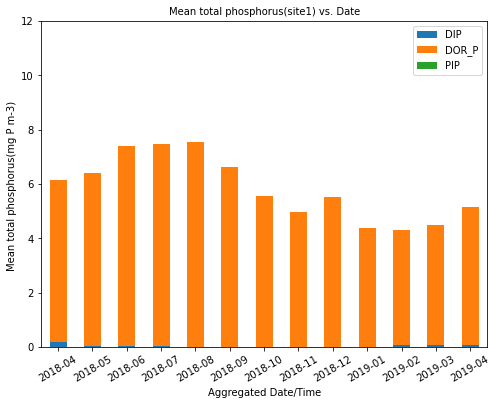

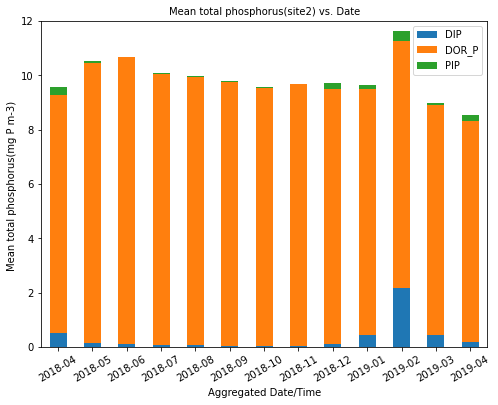

In [13]:
plot_site1=newsite1.plot(kind='bar', stacked=True,figsize= (8,6))
plt.xticks(rotation=30)
plt.yticks(fontsize=10)
plt.ylim([0, 12])
plt.xlabel('Aggregated Date/Time',fontsize=10)
plt.ylabel('Mean total phosphorus(mg P m-3) ',fontsize=10)
plt.legend(fontsize='10')
plt.title('Mean total phosphorus(site1) vs. Date',size='10')
plt.savefig('Mean total phosphorus_site1.jpg',bbox_inches="tight")

plot_site2=newsite2.plot(kind='bar', stacked=True,figsize= (8,6))
plt.xticks(rotation=30)
plt.yticks(fontsize=10)
plt.ylim([0, 12])
plt.xlabel('Aggregated Date/Time',fontsize=10)
plt.ylabel('Mean total phosphorus(mg P m-3) ',fontsize=10)
plt.legend(fontsize='10')
plt.title('Mean total phosphorus(site2) vs. Date',size='10')

plt.savefig('Mean total phosphorus_site2.jpg',bbox_inches="tight")
plt.show()

### In this period, mean total phosphorus value for site 2 is commonly hight than that of site 1, especially in summer. PIP content is not obviously showed in site 1. From site 2 chart, we can see in February 2019, mean total phosphorus reach the highest value.